<a href="https://colab.research.google.com/github/RajK853/tum-adlr-ss21-11/blob/main/notebook/Demo_plot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Setup for Google Colab
The sections below are required to execute this notebook in Google Colab. If you are not executing this notebook in Google colab, you can skip these sections.

## Load Tensorflow
In Google Colab, tensorflow can be easily selected using the given magic command:

In [1]:
%tensorflow_version 2.x

UsageError: Line magic function `%tensorflow_version` not found.


## Cloning the repo
The shell command below clones the git repo if the local repo directory does not exit. Otherwise, it simply pulls the updated version.

In [2]:
%%shell
REPOSRC=https://github.com/RajK853/tum-adlr-ss21-11.git
LOCALREPO=/adlr
 
LOCALREPO_VC_DIR=$LOCALREPO/.git
 
if [ ! -d $LOCALREPO_VC_DIR ]
then
    git clone $REPOSRC $LOCALREPO
else
    cd $LOCALREPO
    git pull $REPOSRC
fi

UsageError: Cell magic `%%shell` not found.


## Setting the working directory
By default, the working directory is `./notebook/` for Jupyter Lab. Therefore, we set the working directory to that path also in Google Colab so that the later cells are compatible with both Google Colab and Jupyter Lab. 

In [3]:
%cd /adlr/notebook

[Errno 2] No such file or directory: '/adlr/notebook'
/home/rajk/DIT/ADLR/tum-adlr-ss21-11/notebook


## Mount Google Drive
Mount your Google drive to access the data set located in your Google drive.

In [5]:
try:
    from google.colab import drive
    drive.mount("/content/drive")
except ModuleNotFoundError:
    pass

# Implementation
The sections below works for both Google Colab and Jupyter Notebook.

In [6]:
import numpy as np
import matplotlib.pyplot as plt

In [7]:
# Change directory to src to import functions from load.py
%cd "../src"
from load import get_values_sql, compressed2img, object2numeric_array

/home/rajk/DIT/ADLR/tum-adlr-ss21-11/src


## Initialize global variables
> The `db_path` variable is the path to the data set located in Google Drive or in your local machine.

In [10]:
db_path = r"../SingleSphere02.db"   # Path of the data in Google Drive or in your local machine
n_voxels = 64
voxel_size = 10 / 64     # in m
extent = [0, 10, 0, 10]  # in m
n_waypoints = 22         # start + 20 inner points + end
n_dim = 2
n_paths_per_world = 1000
path_rows = [0, 1, 1000, 2000, 3500]

## Loading data

Each world consists of **1000 different path configurations** such that path index 0 - 999 is in world 0, path index 1000 - 1999 is in world 1 etc.
$$world_{index} = floor(\frac{path_{index}}{1000})$$

In [11]:
worlds = get_values_sql(file=db_path, table='worlds')
obstacle_images = compressed2img(img_cmp=worlds.obst_img_cmp.values, n_voxels=n_voxels, n_dim=n_dim)
print(f"Obstacle images dimension: {obstacle_images.shape}")

paths = get_values_sql(file=db_path, table='paths', rows=path_rows)
path_images = compressed2img(img_cmp=paths.path_img_cmp.values, n_voxels=n_voxels, n_dim=n_dim)
start_images = compressed2img(img_cmp=paths.start_img_cmp.values, n_voxels=n_voxels, n_dim=n_dim)
end_images = compressed2img(img_cmp=paths.end_img_cmp.values, n_voxels=n_voxels, n_dim=n_dim)

q_paths = object2numeric_array(paths.q_path.values)
q_paths = q_paths.reshape(-1, n_waypoints, n_dim)

Obstacle images dimension: (5000, 64, 64)


/home/rajk/DIT/ADLR/tum-adlr-ss21-11/src/load.py:163: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  value = np.array([np.frombuffer(v, dtype=int) for v in value])


## Plot the graphs example
In this section, we will plot the individual components separately as well as combined.

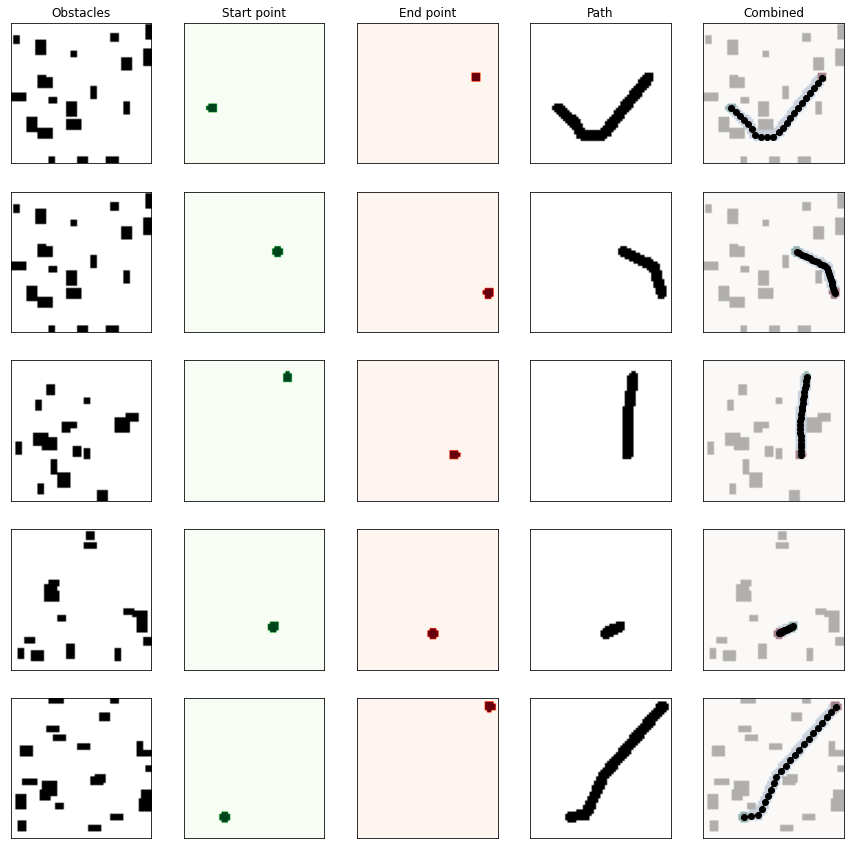

In [12]:
nrows = min(5, len(path_rows))             # Only plot the first N graphs
_, axs = plt.subplots(nrows=nrows, ncols=5, figsize=(3*nrows, 15))
for i in range(nrows):
    world_i = path_rows[i]//n_paths_per_world
    axs[i, 0].imshow(obstacle_images[world_i].T, origin='lower', extent=extent, cmap='binary')
    axs[i, 1].imshow(start_images[i].T, origin='lower', extent=extent, cmap='Greens')
    axs[i, 2].imshow(end_images[i].T, origin='lower', extent=extent, cmap='Reds')
    axs[i, 3].imshow(path_images[i].T, origin='lower', extent=extent, cmap='binary')
    # COmbined plot
    axs[i, 4].imshow(obstacle_images[world_i].T, origin='lower', extent=extent, cmap='binary')
    axs[i, 4].imshow(start_images[i].T, origin='lower', extent=extent, cmap='Greens', alpha=0.4)
    axs[i, 4].imshow(end_images[i].T, origin='lower', extent=extent, cmap='Reds', alpha=0.4)
    axs[i, 4].imshow(path_images[i].T, origin='lower', extent=extent, cmap='Blues', alpha=0.2)
    axs[i, 4].plot(*q_paths[i].T, color='k', marker='o')
    # Set titles and remove x/y ticks
    for (ax, title) in zip(axs[i], ("Obstacles", "Start point", "End point", "Path", "Combined")) :
        if i == 0:
            ax.set_title(title)
        ax.set_xticks([])
        ax.set_yticks([])
plt.show()